<a href="https://colab.research.google.com/github/Fahmidanishi/CODES/blob/main/k_means(wine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/wine-clustering.csv')

In [ ]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
dataset = dataset.drop(columns=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','OD280'])
#Removed the leading tabs or spaces from the column names: 'Alcohol', 'Color_Intensity', and 'OD280'

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hue      178 non-null    float64
 1   Proline  178 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


In [ ]:
dataset.shape

(178, 2)

##Elbow method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,15):
  kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmean.fit(dataset)
  wcss.append(kmean.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

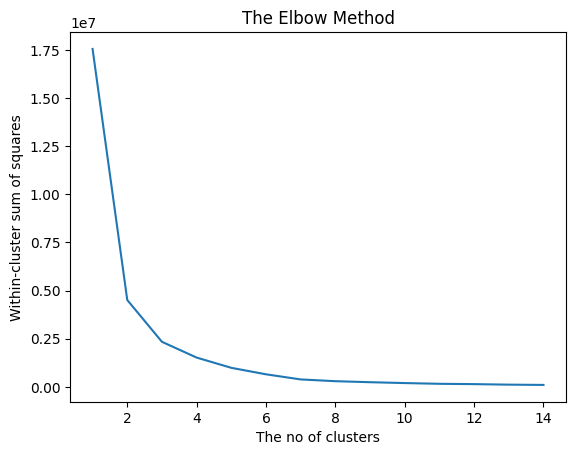

In [ ]:
plt.plot(range(1,15),wcss)
plt.xlabel('The no of clusters')

plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method')


In [ ]:
kmean = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

In [ ]:
kmean.fit(dataset)

KMeans(n_clusters=3, random_state=0)

In [ ]:
cluster_num = kmean.fit_predict(dataset) # kon data kon cluster e
cluster_num

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [ ]:
dataset['cluster_number']=cluster_num

In [ ]:
dataset # dataset e new column add hoise cluster_number

,Hue,Proline,cluster_number
0,1.04,1065,1
1,1.05,1050,1
2,1.03,1185,1
3,0.86,1480,1
4,1.04,735,2
...,...,...,...
173,0.64,740,2
174,0.70,750,2
175,0.59,835,2
176,0.60,840,2


In [ ]:
dataset.groupby(['cluster_number']).count()

,Hue,Proline
cluster_number,,
0,69,69
1,47,47
2,62,62


In [ ]:
x = pd.read_csv('/content/wine-clustering.csv')

In [ ]:
x=x.drop(columns=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','OD280'])

In [ ]:
cluster_num = kmean.fit_predict(dataset)

In [ ]:
print(cluster_num.shape)
print(cluster_num.dtype)

(178,)
int32


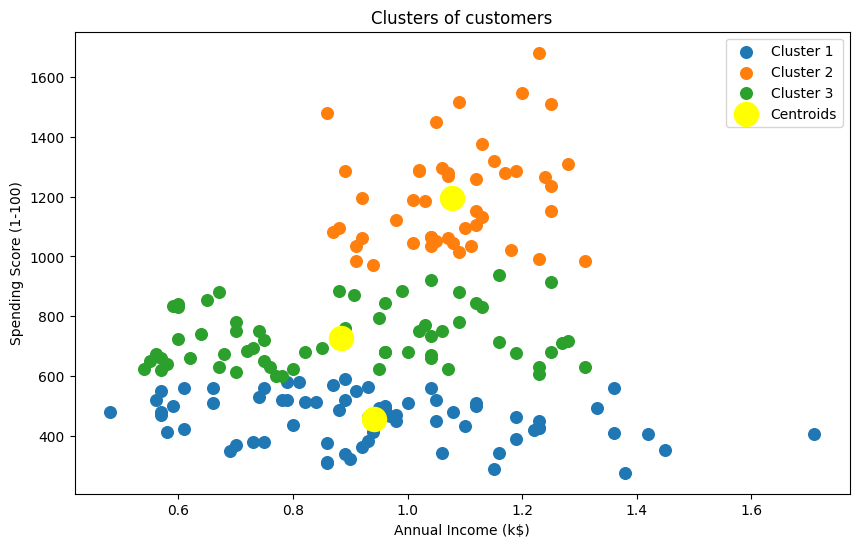

In [ ]:
#visulalizing the cluster
plt.figure(figsize=(10,6))
k = 3
#loop through the clusters
for i in range(k):
  if isinstance(x,np.ndarray): #if x is a NumPy array
    plt.scatter(x[cluster_num == i, 0], x[cluster_num ==i, 1],s = 70, label = f'Cluster {i+1}') #s=size of the points
  else: #if x is a pandas dataframe
      plt.scatter(dataset.iloc[cluster_num ==i, 0], x.iloc[cluster_num ==i, 1], s=70, label=f'Cluster {i+1}')

#plot the centroids
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s= 300, c='yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
